<h1>Isaiah Pinto</h1>
<h3>October 1, 2023</h1>

<h1>Introduction</h1>
<p>The dataset provided was sourced from <a href = "https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting">Kaggle</a>. Initially, the dataset was intended to forecast the sales of next seven days, however I opted to simply do an extensive analysis of the dataset trying to find possible problems that can be extracted from the file. Below you will be able to see a discussion showing all the goals of the study and the important insights I was able to obtain, and finally a more extensive discussion of my thought process going through the file.</p>

I have tried answering several business questions for this project which are listed down below:
1. What is the overall sales trend for the Super Store?
2. Which category has the highest amount of Sales?
3. What are the different sub-categories per category?
4. What is the lead time per shipping mode?
5. Why is there an outlier on Same Day Deliveries?
6. Are there any significant difference between lead times across different days?
7. Who has the highest amount of sales quantity per customer segment?
8. What category does each customer segment buy the most?

<h1>Insights</h1>
<p>Overall the company as a whole is performing well with an increasing trend of sales from 2015 to 2018.  One noticable trend is that Technology Category has shown an increasing overall trend across the years, meanwhile the other two different categories (Furniture and office supplies) have only been averaging in a range and showing no clear signs of a trend.  The company may look into improving their marketing on these two products while still maintain Technology's upward trend.</p>
<p>One noticable occurence was that there were deliveries for Same Day shipping modes were not able to deliver its promised same day delivery.  The company may look further into it by getting more data on the matter.  The dataset provided was not able to deduce as to why this has happened.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

<h2>Data Preparation</h2>

In [2]:
df0 = pd.read_csv("/Users/isaiahpinto/PycharmProjects/Personal-Projects/Supermarket Online Sales Data/train.csv")

In [3]:
df0

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [4]:
df = df0.copy()

<h2>Data Cleaning and Structuring</h2>

In [5]:
df.columns = df.columns.str.replace(" ","_")
df['Order_Date'] = pd.to_datetime(df["Order_Date"],format="%d/%m/%Y")
df['Ship_Date'] = pd.to_datetime(df["Ship_Date"],format="%d/%m/%Y")
df['Month_Year'] = df['Order_Date'].dt.to_period('M')
df['Order_Day'] = df['Order_Date'].dt.day_name()
df['Ship_Month'] = df['Ship_Date'].dt.month
df['Category'] = df['Category'].astype('category')
df['Ship_Mode'] = df['Ship_Mode'].astype('category')
df.head(3)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Month_Year,Order_Day,Ship_Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017-11,Wednesday,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017-11,Wednesday,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017-06,Monday,6


In [6]:
df.describe()

,Row_ID,Order_Date,Ship_Date,Postal_Code,Sales,Ship_Month
count,9800.000000,9800,9800,9789.000000,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55273.322403,230.769059,7.752245
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000,1.000000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.000000,17.248000,5.000000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.490000,9.000000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.605000,11.000000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000,12.000000
std,2829.160653,NaN,NaN,32041.223413,626.651875,3.337933


In [7]:
df.shape

(9800, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   category      
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal_Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product_ID     9800 non-null   object        
 14  Category       9800 non-null   category      
 15  Sub-Category   9800 n

In [9]:
df.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub-Category      0
Product_Name      0
Sales             0
Month_Year        0
Order_Day         0
Ship_Month        0
dtype: int64

In [10]:
df_isnull = df[df.isna().any(axis=1)]
df_isnull

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Month_Year,Order_Day,Ship_Month
2234,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,2018-12,Wednesday,12
5274,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,2016-11,Monday,11
8798,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,2017-04,Thursday,4
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2017-01,Monday,1
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,2017-01,Monday,1
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,2017-01,Monday,1
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,2018-01,Friday,1
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,2018-01,Friday,1
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,2018-01,Friday,1
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,2018-01,Friday,1


The missing values in the dataframe comes from the Postal Code column where all of the data comes from Burlington City in Vermont
To further validate this I will extract from the dataframe that only shows this City and State

In [11]:
df[(df['City']=='Burlington') & (df['State']=='Vermont')]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Month_Year,Order_Day,Ship_Month
2234,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,2018-12,Wednesday,12
5274,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,2016-11,Monday,11
8798,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,2017-04,Thursday,4
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2017-01,Monday,1
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,2017-01,Monday,1
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,2017-01,Monday,1
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,2018-01,Friday,1
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,2018-01,Friday,1
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,2018-01,Friday,1
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,2018-01,Friday,1


Upon searching online, Burlington ,Vermont  on the East side has a 05401 Postal code. I will be replacing these null values into this data

In [12]:
df= df.replace(np.nan,5401)

In [13]:
df['Postal_Code'] = df['Postal_Code'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   category      
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal_Code    9800 non-null   int64         
 12  Region         9800 non-null   object        
 13  Product_ID     9800 non-null   object        
 14  Category       9800 non-null   category      
 15  Sub-Category   9800 n

Check for duplicates

In [14]:
df.duplicated().sum()

0

<h2>Exploratory Data Analysis</h2>

In [15]:
df.describe()

,Row_ID,Order_Date,Ship_Date,Postal_Code,Sales,Ship_Month
count,9800.000000,9800,9800,9800.000000,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55217.343265,230.769059,7.752245
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000,1.000000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.000000,17.248000,5.000000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,57551.000000,54.490000,9.000000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.605000,11.000000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000,12.000000
std,2829.160653,NaN,NaN,32066.750532,626.651875,3.337933


<h4>1. What is the overall sales trend of the Super Store?</h4>

Text(0.5, 1.0, 'Sales trend per category over the years')

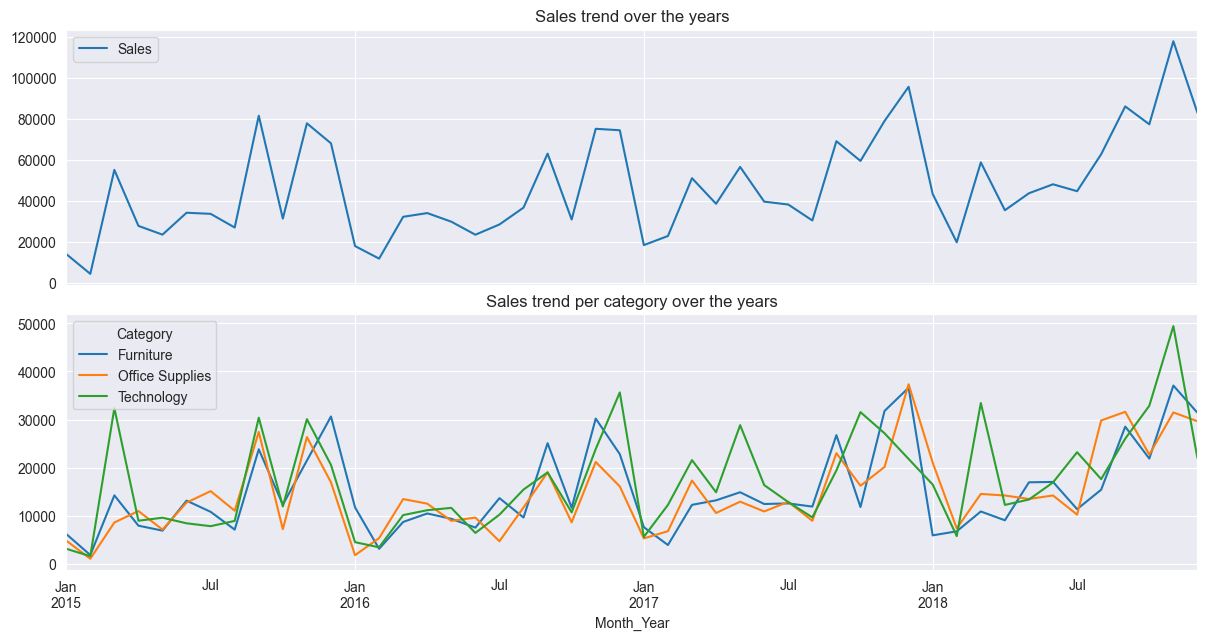

In [16]:
fig,axs=plt.subplots(2,1,figsize=(12,6),sharex=True)
fig.tight_layout()
#Plotting Sales Trend over the years
(df.groupby(['Month_Year'],as_index=True,observed=True)[['Sales']]
 .sum()
 .plot(kind='line',ax=axs[0]))

axs[0].set_title("Sales trend over the years")

#Plotting Sales trend per Category over the years
(df.groupby(['Category','Month_Year'],as_index=False,observed=True)[['Sales']]
 .sum()
 .pivot(index="Month_Year",columns="Category",values="Sales")
 .plot(kind='line',ax=axs[1]))

axs[1].set_title("Sales trend per category over the years")

<h4>2. Which category has the highest amount of sales?</h4>

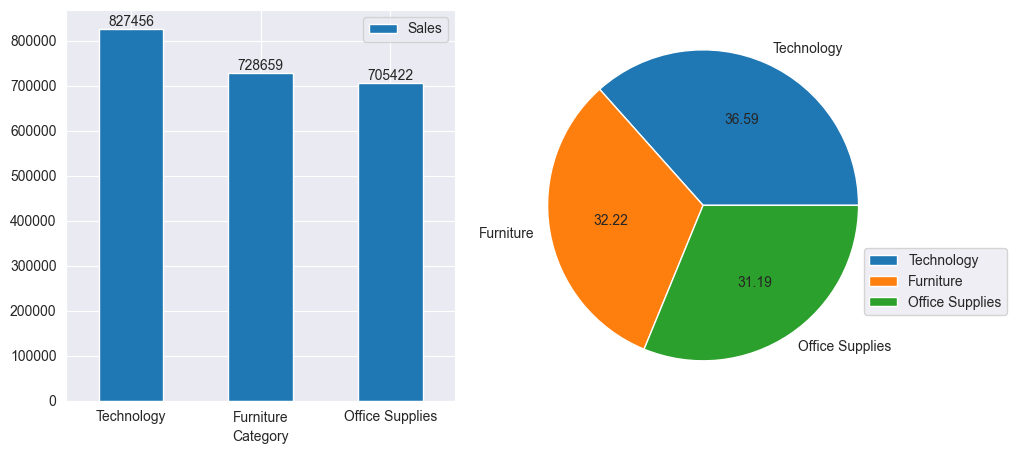

In [17]:
fig,axs=plt.subplots(1,2,figsize=(9,4.5))
fig.tight_layout()

(df.groupby(['Category'],as_index=True,observed=True)[['Sales']]
 .sum()
 .sort_values(by='Sales',ascending=False)
 .plot(kind='bar',ax=axs[0],rot=0)
 )

(df.groupby(['Category'],as_index=True,observed=True)[['Sales']]
 .sum()
 .sort_values(by='Sales',ascending=False)
 .plot(kind='pie',y='Sales',autopct="%.2f",ax=axs[1])
 .legend(bbox_to_anchor=(1.3, .2),loc='lower right'))

axs[1].set_ylabel("")
for container in axs[0].containers:
    axs[0].bar_label(container)

<h4>3. What are the different sub-categories per category</h4

<Axes: ylabel='Category,Sub-Category'>

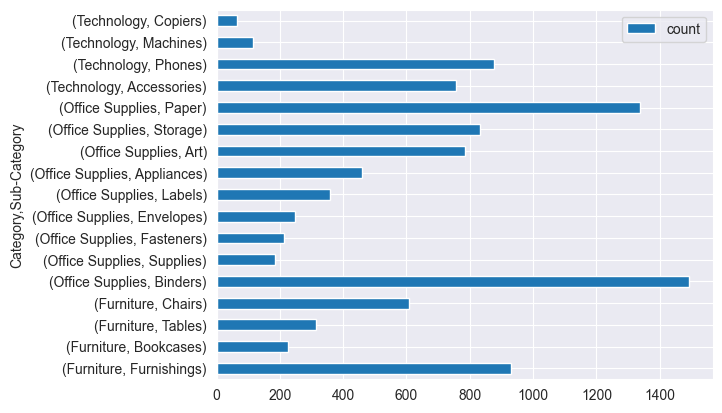

In [18]:
df[['Category','Sub-Category']].value_counts().reset_index().set_index(['Category','Sub-Category']).sort_values(by='Category',ascending=True).plot(kind='barh')

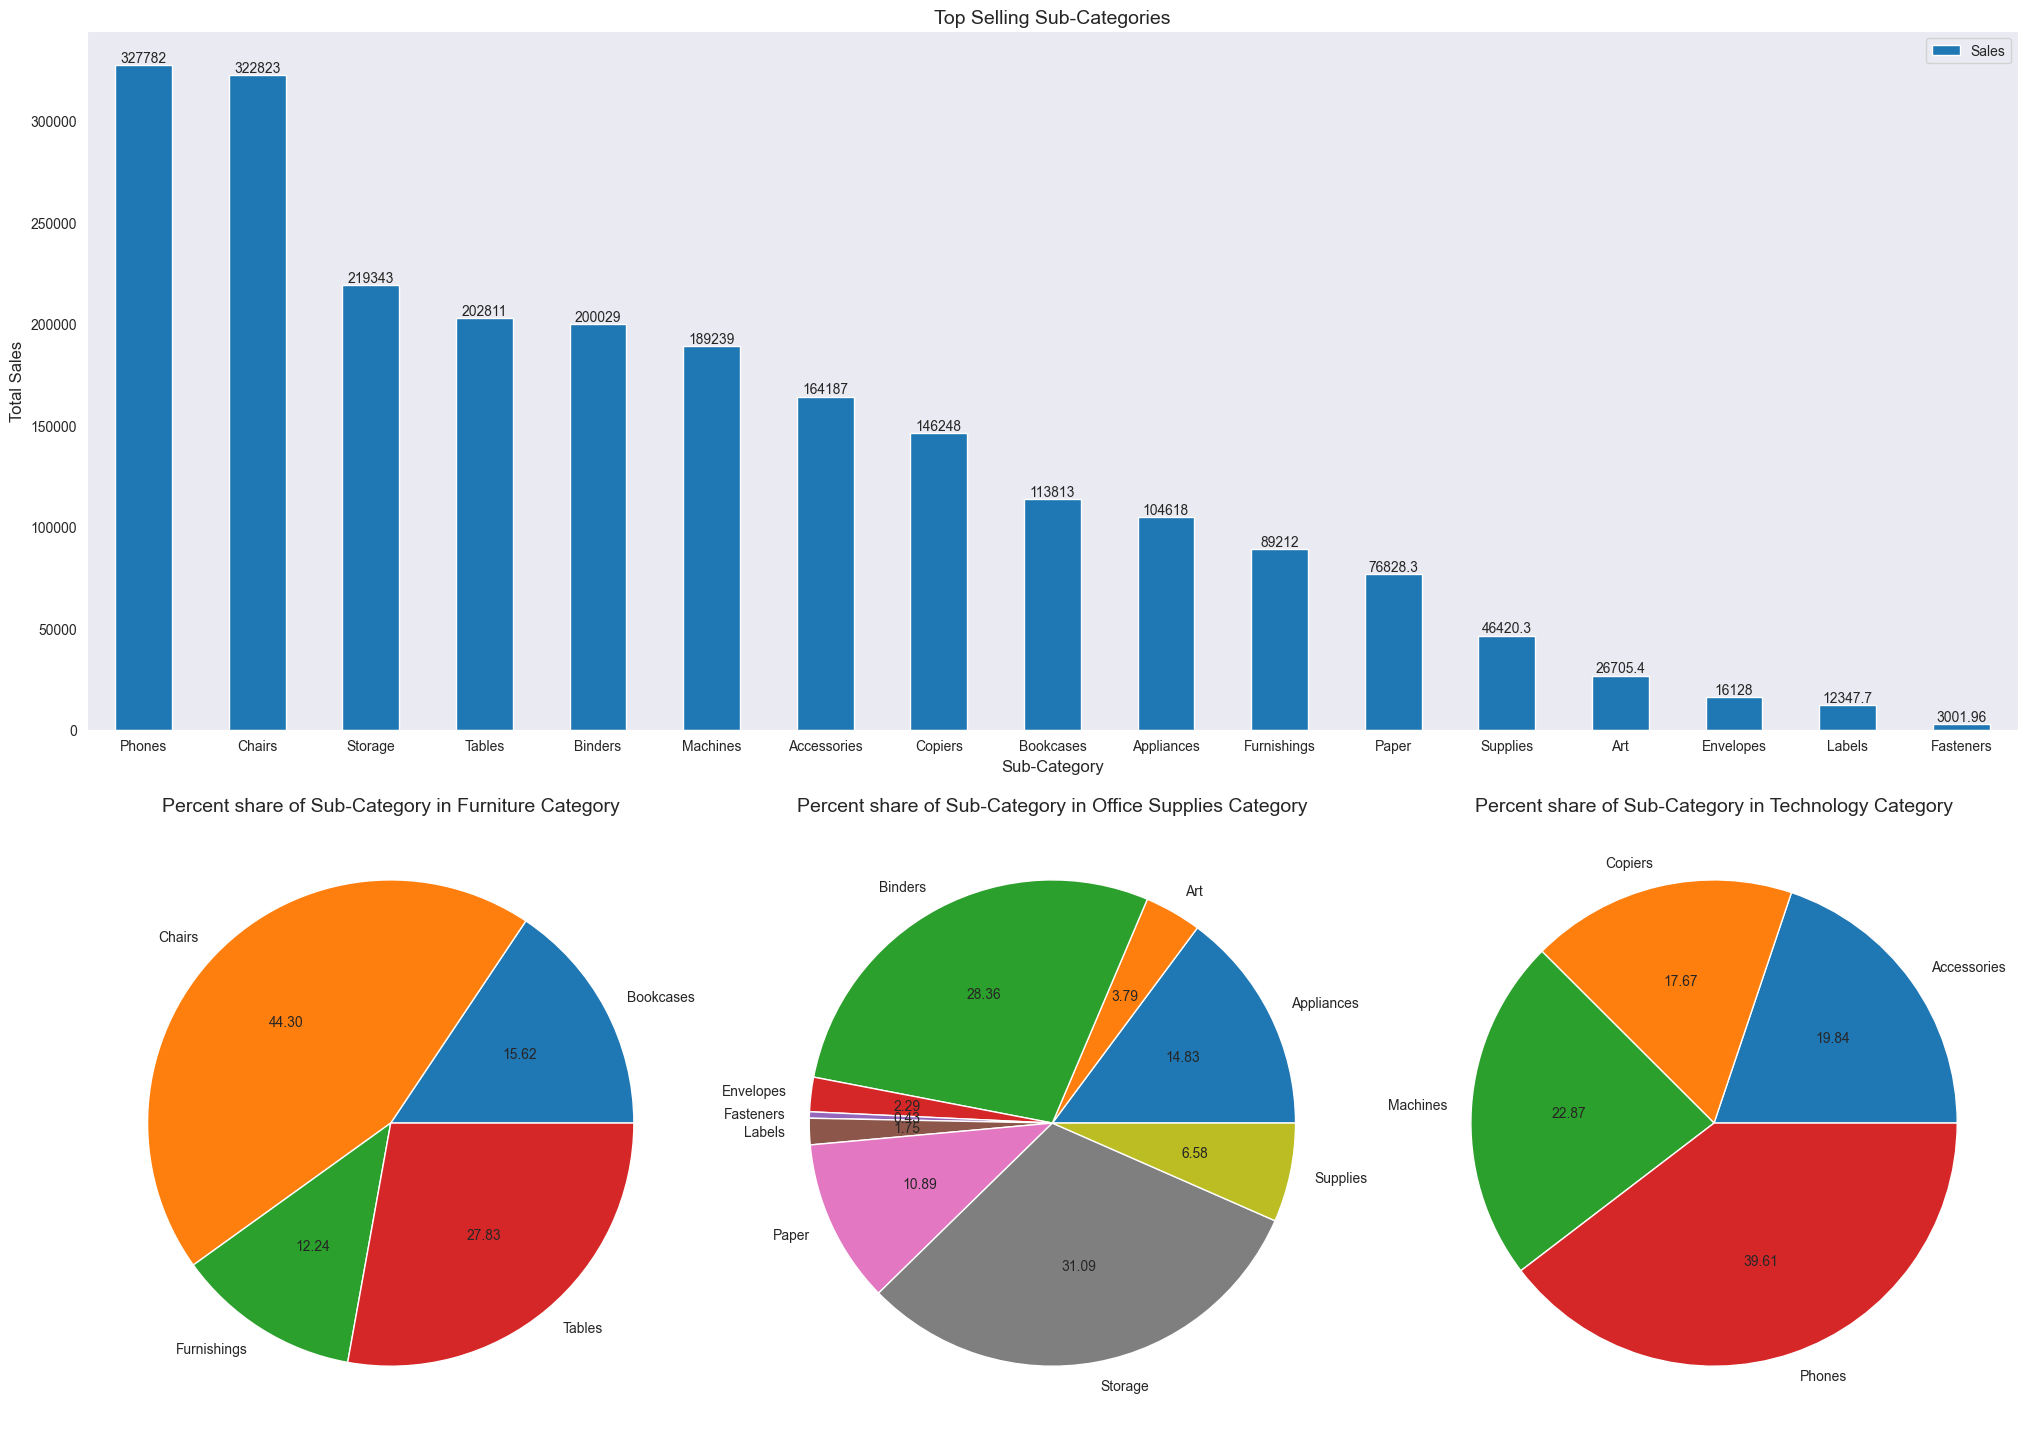

In [19]:
#Creates a list of unique values from the column Category
category_list = list(df['Category'].unique())

#Creates a figure object with a mosaic style of plot
fig,axs=plt.subplot_mosaic([['bar_graph','bar_graph','bar_graph'],category_list],figsize=(20,15))
fig.tight_layout()

#Creates a bar graph with the Total Sales per Category
(df.groupby(['Sub-Category'],as_index=True)[['Sales']]
 .sum()
 .sort_values('Sales',ascending=False)
 .plot(kind='bar',ax=axs['bar_graph'],rot=0))

#Modify bar graph
axs['bar_graph'].grid(False)
axs['bar_graph'].set_title('Top Selling Sub-Categories',fontsize=14)
axs['bar_graph'].set_ylabel('Total Sales',fontsize=12)
axs['bar_graph'].set_xlabel('Sub-Category',fontsize=12)

#Shows the label for the bars per sub-category
for container in axs['bar_graph'].containers:
    axs['bar_graph'].bar_label(container)

#Create a set of pie graphs showing the percent distribution of Sub-Category per Category
for i in range(len(category_list)):
 
 (df[df['Category']==category_list[i]][['Sub-Category','Sales']]
  .groupby(['Sub-Category'],as_index=True)
  .sum()
  .plot(kind='pie',y='Sales',autopct='%.2f',ax=axs[category_list[i]])
  .legend(bbox_to_anchor=(1.1, 0), loc='lower right'))
 
 axs[category_list[i]].legend().set_visible(False)
 axs[category_list[i]].set_title(f'Percent share of Sub-Category in {category_list[i]} Category',fontsize=14)
 axs[category_list[i]].set_ylabel("")

<h4>4. What is the lead time from ordering until shipping</h4>

First let us inspect which ship modes are the most used

/var/folders/41/xpt3z91d4373w0zlgn1h6j8w0000gn/T/ipykernel_99606/2296647298.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(['Ship_Mode'],as_index=True)['Ship_Mode']


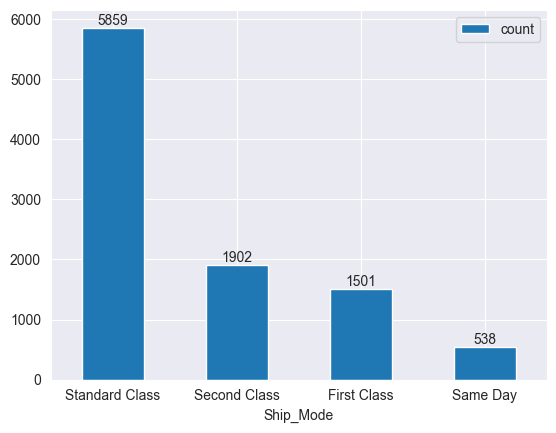

In [20]:

fig, axs=plt.subplots(1,1)

(df.groupby(['Ship_Mode'],as_index=True)['Ship_Mode']
 .agg(['count'])
 .sort_values('count',ascending=False)
 .plot(kind='bar',rot=0,ax=axs))

for container in axs.containers:
    axs.bar_label(container)

In [21]:
df['Lead_Time'] = (df['Ship_Date'] - df['Order_Date'])/(np.timedelta64(1,'D'))

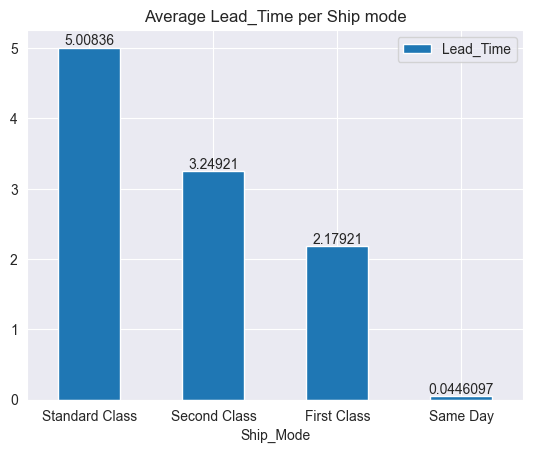

In [22]:
fig,axs=plt.subplots(1,1)

(df.groupby(['Ship_Mode'],observed=True)[['Lead_Time']]
 .mean()
 .sort_values('Lead_Time',ascending=False)
 .plot(kind='bar',ax=axs,rot=0,title='Average Lead_Time per Ship mode'))

for container in axs.containers:
    axs.bar_label(container)

From the graph above we can see that Standard Class has the longest average lead time, mean while same day shipping modes are the fastest.  One thing to note here is that Same day deliveries have low values.  This is something to look into as Same Day deliveries should have 0 lead time.

/Library/Python/3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Lead Time Comparison by Ship_Mode')

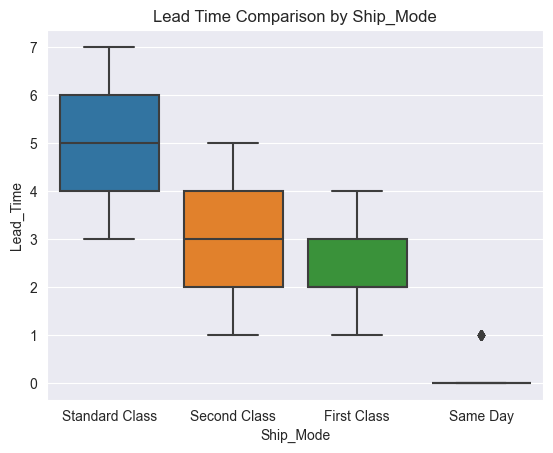

In [23]:
order_ship = ['Standard Class','Second Class','First Class','Same Day']
sns.boxplot(x=df['Ship_Mode'],y=df['Lead_Time'],data=df[['Ship_Mode','Lead_Time']],order=order_ship)
plt.title("Lead Time Comparison by Ship_Mode")

Box Plot is a good indicator to see if there is a statistically significant difference across various categories, to illustrate let us compare Standard Class and Second Class. For the boxplot, We can see that the median of Second class is way below the body of the standard class box plot. In order to validate this, let us do a statistic ttest comparing these two Shipping Modes

In [24]:
def stattest(test1,test2):
 tstat,pvalue = stats.ttest_ind(a=test1,b=test2,equal_var=False)
 if pvalue < 0.05:
  print(f'The p-value of {pvalue} is less than the significant level of 0.05, therefore reject Ho, indicating significant difference between means')
 else:
  print(f'The p-value of {pvalue} is greater than the significant level of 0.05, therefore do no reject Ho, indicating no significant difference between means')
 return

To note, 
Null hypothesis or Ho is when the two means are equal which indicates no significant difference
Alternative hypothesis or H1 is when the two means are not equal which indicates significant difference

In [25]:
standardclass = df[df['Ship_Mode'] == 'Standard Class'][['Lead_Time']]
secondclass = df[df['Ship_Mode'] == 'Second Class'][['Lead_Time']]
stattest(standardclass,secondclass)

The p-value of [0.] is less than the significant level of 0.05, therefore reject Ho, indicating significant difference between means


From this , we can conclude that there is a significant difference between the two types of Shipping modes
Let us try comparing second class and first class  as these two are not so clear if we inspect the box plot

In [26]:
firstclass = df[df['Ship_Mode'] == 'First Class'][['Lead_Time']]
stattest(secondclass,firstclass)

The p-value of [2.27883892e-192] is less than the significant level of 0.05, therefore reject Ho, indicating significant difference between means


<p>From this, we can conclude that there is no significant difference of lead time from First Class and Second class. The company may conduct further inspection on this as consumers are paying a premium for a first class service if we were only to compare lead times.  There may be other differing factors that we do not know , but given the dataset we can only compare lead times.</p>

<h4>5. Why is there an outlier in Same Day Deliveries?</h4>

In [27]:
df[df['Ship_Mode']=='Same Day']['Lead_Time'].value_counts()

Lead_Time
0.0    514
1.0     24
Name: count, dtype: int64

Text(0.5, 1.0, 'Average Sales by Lead Time for Same Day Shipping Modes')

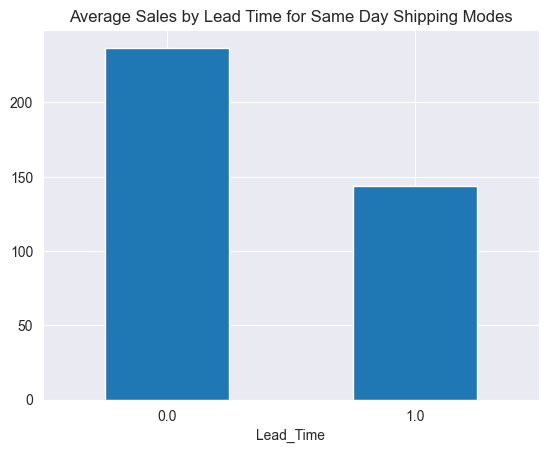

In [28]:
sameday = df[df['Ship_Mode']=='Same Day'][['Category','Lead_Time','Sales']]
(sameday
 .groupby(['Lead_Time'],as_index=True)['Sales']
 .mean()
 .plot(kind='bar',x='Lead_Time',rot=0))
plt.title('Average Sales by Lead Time for Same Day Shipping Modes')

<p>From this graph alone, we can see that Average Sales Quantity for those that were successfully delivered on the same day were higher compared to those who were not. To be more confident about this, let us do a statistic test.</p>


In [29]:
Lead_Time1 = sameday[(sameday['Lead_Time'] == 1)][['Sales']]
Lead_Time0 = sameday[(sameday['Lead_Time'] != 1)][['Sales']]
stattest(Lead_Time1,Lead_Time0)  

The p-value of [0.29867018] is greater than the significant level of 0.05, therefore do no reject Ho, indicating no significant difference between means


Let us try to dig deeper on this though and break down the sales into its categories

<Axes: title={'center': 'Bar Graph breakdown of Sales per Category by the Lead Time of Same Day Ship Modes'}, xlabel='Lead_Time'>

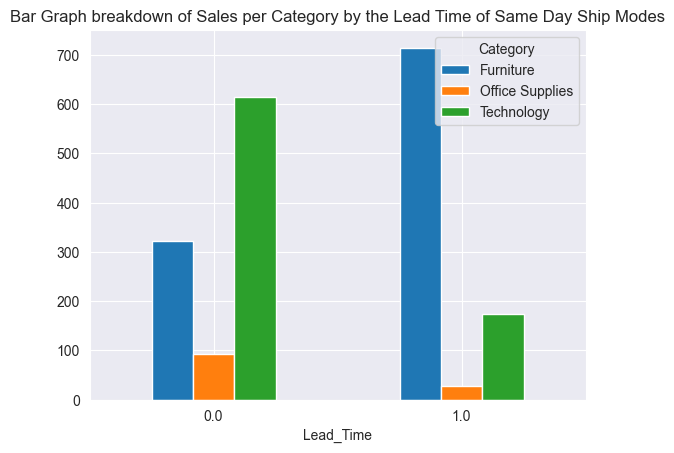

In [30]:
(sameday.groupby(['Category','Lead_Time'],as_index=False,observed=True)['Sales']
 .mean()
 .pivot(index='Lead_Time',columns='Category',values='Sales')
 .plot(kind='bar',rot=0,title="Bar Graph breakdown of Sales per Category by the Lead Time of Same Day Ship Modes"))

It is clear from the graph that Furniture have a higher average sales with those who had a Same Day Delivery lead time of 1 as opposed to those had 0. To further investigate on this let us once again do a statistics test.

In [31]:
furniture_sameday_1 = sameday[(sameday['Category']=='Furniture') & (sameday['Lead_Time']==1)]['Sales']
furniture_sameday_0 = sameday[(sameday['Category']=='Furniture') & (sameday['Lead_Time']==0)]['Sales']
stattest(furniture_sameday_1,furniture_sameday_0)

The p-value of 0.6170396601105448 is greater than the significant level of 0.05, therefore do no reject Ho, indicating no significant difference between means


Even though it is clear in the graph that Furniture Sales of Lead time of 1 has a higher average sales, it is still not significantly different as opposed to those who had 0. This is probably due to lower sample size if we compare the two. Let us check the number of sample for each

In [32]:
print(f'The number of samples for Sales of Furntiure Category with Lead Time of 1 has {len(furniture_sameday_1)} samples')
print(f'The number of samples for Sales of Furntiure Category with Lead Time of 0 has {len(furniture_sameday_0)} samples')

The number of samples for Sales of Furntiure Category with Lead Time of 1 has 3 samples
The number of samples for Sales of Furntiure Category with Lead Time of 0 has 115 samples


<h4>6. Are there any significant difference between lead times across different days?</h4>

<Axes: title={'center': 'Average Lead Time by Shipping Day'}, xlabel='Order_Day'>

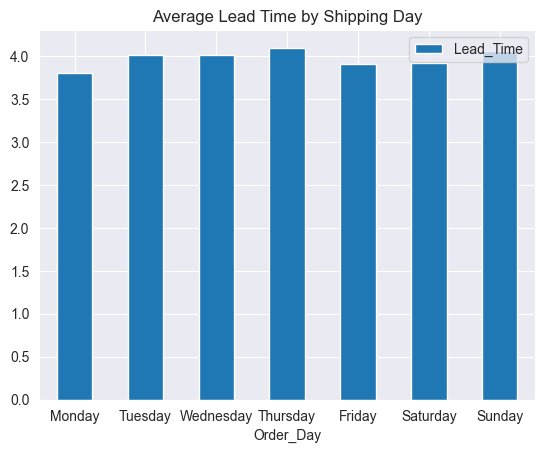

In [33]:
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_name = df[['Order_Day','Lead_Time']]
day_name.groupby(['Order_Day']).mean().reindex(order).plot(kind='bar',title="Average Lead Time by Shipping Day",rot=0)

<Axes: xlabel='Order_Day', ylabel='Lead_Time'>

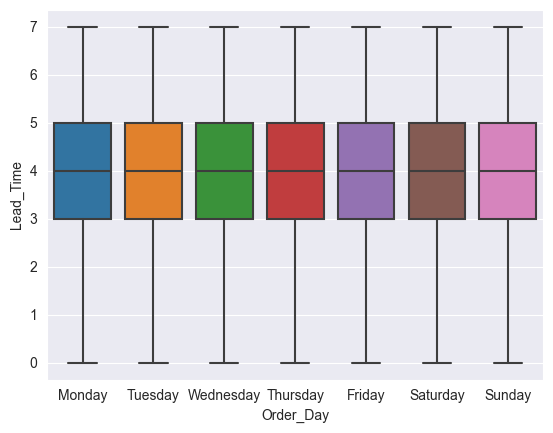

In [34]:
sns.boxplot(data=day_name,x='Order_Day',y='Lead_Time',order=order)

From this boxplot it is clear that there are no significant difference between one another

<h4>7. Who has the highest amount of sales quantity per customer segment?</h4>

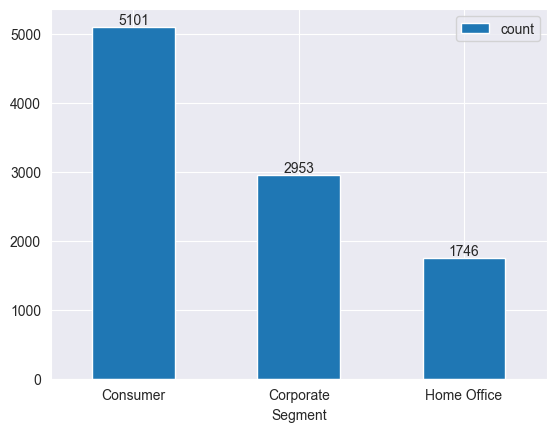

In [35]:
fig,axs=plt.subplots(1,1)

(df[['Segment']]
 .value_counts()
 .reset_index()
 .set_index('Segment')
 .plot(kind='bar',rot=0,ax=axs))

for container in axs.containers:
    axs.bar_label(container)

<h4>8. What category does each customer segment buy the most?</h4>

<Axes: title={'center': 'Total Sales per Category by Customer Segment'}, xlabel='Segment'>

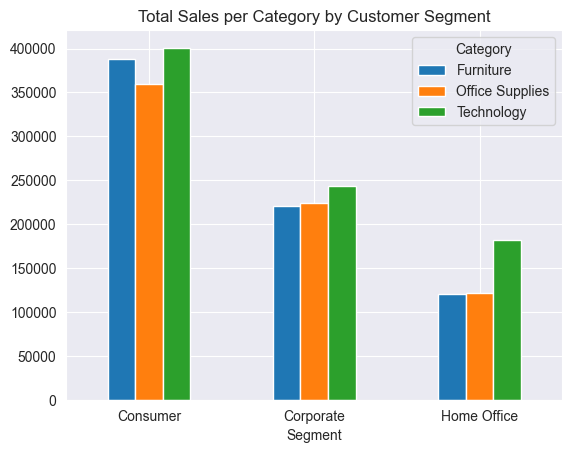

In [36]:
(df.groupby(['Category','Segment'],as_index=False, observed=True)[['Sales']]
 .sum()
 .pivot(index='Segment',columns='Category',values='Sales')
 .plot(kind='bar',title='Total Sales per Category by Customer Segment',rot=0))

From the graph we can see that across the three customer segments, technology was the highest category bought